In [6]:
# pip install imbalanced-learn
print(imblearn.__version__)

0.9.0


In [5]:
import imblearn
print(imblearn.__version__)

0.9.0


In [7]:
# make_classification으로 임의 데이터 생성
from sklearn.datasets import make_classification


In [8]:
# define dataset
# data 1만개중 99% 가 0을 갖고, 나머지 1% 가 1의 값을 가짐, feature 수는 2(2차원)
# -> 정답 데이터 생성
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [12]:
from collections import Counter

In [13]:
counter = Counter(y)
print(counter)
# 0은 majority, 1은 minority가 됨을 확인

Counter({0: 9900, 1: 100})


In [14]:
import matplotlib.pyplot as plt

In [15]:
counter.items()

dict_items([(0, 9900), (1, 100)])

In [16]:
X[0]

array([0.22201371, 0.54020654])

In [17]:
from numpy import where

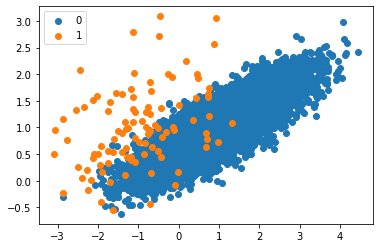

In [18]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

위 데이터를 보면 boarder line이 제대로 안그려짐을 확인함.

# To use SMOTE

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
# SMOTE의 resample 을 사용
smt = SMOTE()
X_new, y_new = smt.fit_resample(X, y)

In [21]:
# 비율은 다르게 설정할 수 있으나, 기본적으로 major를 1:1로 맞춰줌
counter = Counter(y_new)
print(counter)

Counter({0: 9900, 1: 9900})


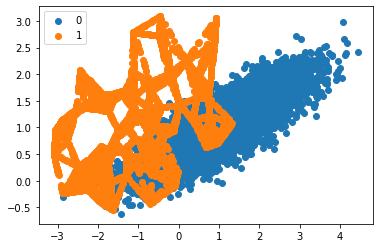

In [22]:
for label, _ in counter.items():
    row_ix = where(y_new == label)[0]
    plt.scatter(X_new[row_ix, 0], X_new[row_ix, 1], label=str(label))
plt.legend()
plt.show()

두 관측치 사이의 직선에서 랜덤 샘플링 하기 때문에 위 모양이 생성됨.

The original paper on SMOTE suggested combining SMOTE with random undersampling of the majority class.

-> minor은 oversample, major는 undersample하는 방법을 제안해봄

In [23]:
from imblearn.under_sampling import RandomUnderSampler

In [24]:
smt1 = SMOTE(sampling_strategy=0.1) #10% of data points with majority class
# 9900의 10%인 990개 생성
undersample = RandomUnderSampler(sampling_strategy=0.5) # minority class가 majority의 50%가 되도록
# 990 * 2 = 1980개

In [25]:
X_new1, y_new1 = smt1.fit_resample(X, y)

In [26]:
counter = Counter(y_new1)
print(counter)
# 10%

Counter({0: 9900, 1: 990})


In [27]:
X_new2, y_new2 = undersample.fit_resample(X_new1, y_new1)

In [28]:
counter = Counter(y_new2)
print(counter)

Counter({0: 1980, 1: 990})


# Borderline SMOTE

In [29]:
from imblearn.over_sampling import BorderlineSMOTE

In [30]:
bdsmt = BorderlineSMOTE()
X_border, y_border = bdsmt.fit_resample(X, y)

In [31]:
counter = Counter(y_border)
print(counter)

Counter({0: 9900, 1: 9900})


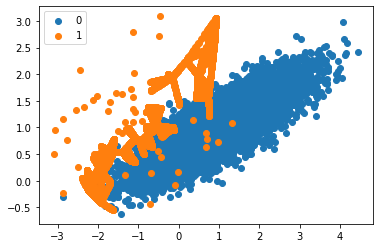

In [32]:
for label, _ in counter.items():
    row_ix = where(y_border == label)[0]
    plt.scatter(X_border[row_ix, 0], X_border[row_ix, 1], label=str(label))
plt.legend()
plt.show()

# ADASYN

In [33]:
from imblearn.over_sampling import ADASYN

In [34]:
adasyn = ADASYN()
X_ads, y_ads = adasyn.fit_resample(X, y)

In [35]:
counter = Counter(y_ads)
print(counter)

Counter({0: 9900, 1: 9899})


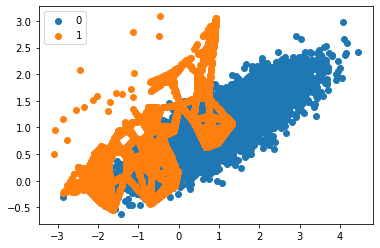

In [36]:
for label, _ in counter.items():
    row_ix = where(y_ads == label)[0]
    plt.scatter(X_ads[row_ix, 0], X_ads[row_ix, 1], label=str(label))
plt.legend()
plt.show()